In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np

X = [[1, 33],
     [2, 27],
     [3, 29],
     [4, 45],
     [5, 27],
     [6, 33],
     [7, 35]]
Y = [25000, 55000, 75000, 125000, 128000, 155000, 182000]

Y = [[i] for i in Y]

x_data = torch.Tensor(X)
y_data = torch.Tensor(Y)
  
class LinearRegressionModel(torch.nn.Module): 
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(input_dim, output_dim)
    def forward(self, x): 
        y_pred = self.linear(x)
        return y_pred

model = LinearRegressionModel(2, 1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001) 
  
for epoch in range(100001):
    pred_y = model(x_data)
    loss = criterion(pred_y, y_data)
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()
    if epoch % 10000 == 0:
        print("[ epoch: %d, cost: %.2f ]" % (epoch, loss.data))
        print("w1 = %.2f, w2 = %.2f, b = %.2f" % (model.linear.weight[0][0], model.linear.weight[0][1], model.linear.bias))

print("f(x) = %.2fx1 + %.2fx2 + %.2f" % (model.linear.weight[0][0], model.linear.weight[0][1], model.linear.bias))
print("예측값: [%.2f]" % (model(torch.Tensor([[1, 33]]))))

[ epoch: 0, cost: 14059927552.00 ]
w1 = 105.61, w2 = 715.97, b = 21.75
[ epoch: 10000, cost: 44817216.00 ]
w1 = 24747.68, w2 = 303.08, b = -1554.23
[ epoch: 20000, cost: 41596924.00 ]
w1 = 24782.06, w2 = 352.08, b = -3347.35
[ epoch: 30000, cost: 38737756.00 ]
w1 = 24805.23, w2 = 399.36, b = -5037.14
[ epoch: 40000, cost: 36198764.00 ]
w1 = 24827.06, w2 = 443.92, b = -6629.51
[ epoch: 50000, cost: 33944232.00 ]
w1 = 24847.64, w2 = 485.91, b = -8129.99
[ epoch: 60000, cost: 31942026.00 ]
w1 = 24867.25, w2 = 525.45, b = -9544.07
[ epoch: 70000, cost: 30164110.00 ]
w1 = 24886.78, w2 = 562.59, b = -10876.56
[ epoch: 80000, cost: 28585274.00 ]
w1 = 24904.98, w2 = 597.61, b = -12132.26
[ epoch: 90000, cost: 27183076.00 ]
w1 = 24921.21, w2 = 630.73, b = -13315.73
[ epoch: 100000, cost: 25938134.00 ]
w1 = 24936.49, w2 = 661.93, b = -14430.79
f(x) = 24936.49x1 + 661.93x2 + -14430.79
예측값: [32349.39]


In [3]:
print("예측값: [%.2f]" % (model(torch.Tensor([[8, 33]]))))

예측값: [206904.84]


/Users/KBS/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


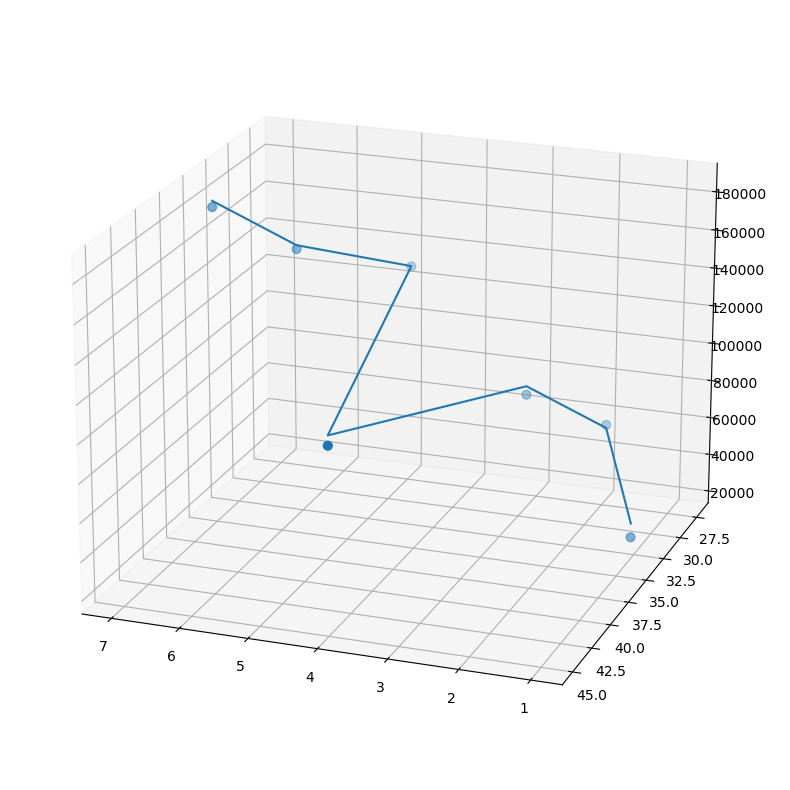

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.view_init(20, 110)

x1 = [1, 2, 3, 4, 5, 6, 7]
x2 = [33, 27, 29, 45, 27, 33, 35]
y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]
ax.scatter(x1, x2, y, s=40)

y_pred = [model(torch.Tensor(i)).tolist()[0] for i in X]
ax.plot(x1, x2, y_pred)